In [65]:
# CNN classificatiion for text classification  


#tfidf+wavelet
#tfidf
#w2v        

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
import os
from textblob import TextBlob
import tensorflow as tf
# import libraries for text processing
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import demoji
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

#import tensorflow keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D, GlobalMaxPooling1D , Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yigitagalar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yigitagalar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yigitagalar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/yigitagalar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yigitagalar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import tensorflow as tf

In [3]:
# import libraries for text processing
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import demoji

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yigitagalar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yigitagalar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yigitagalar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/yigitagalar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [69]:
# read data btc_tweets.csv
df = pd.read_csv('btc_tweets.csv')
df = df.iloc[0:70000]
df.head()
df.shape

FileNotFoundError: [Errno 2] No such file or directory: 'btc_tweets.csv'

In [ ]:
spam_words = ['btc', 'eth', 'xrp', 'ltc', 'bch', 'eos', 'bnb', 'xtz', 'ada', 'xlm',
                    'trx', 'usdt', 'link', 'xmr', 'leo', 'miota', 'tusd', 'neo', 'xem',
                    'xvg', 'btmx', 'bsv', 'vet', 'ht', 'dcr', 'pax', 'bat', 'cro', 'dash',
                    'oxt', 'zec', 'lend', 'hbar', 'mkr', 'wtc', 'xzc', 'yfi', 'dai', 'btg',
                    'atom', 'qnt', 'cvc', 'doge', 'paxg', 'link', 'usdc', 'grt', 'rvn', 'iost','sol','algo','luna','solana','algorand','lunacoin','shin','matic',
                    'mdt', 'ftt', 'bcd', 'dgb', 'bnt', 'bat', 'tomo', 'tfuel', 'tnt', 'tmtg',
                    'tct', 'tachain', 'tmt', 'tct', 'tachain', 'tmt', 'tct', 'tachain', 'tmt',
                    'tct', 'tachain', 'tmt', 'tct', 'tachain', 'tmt', 'tct', 'tachain', 'tmt','bitcoin', 'ethereum', 'ripple', 'litecoin', 'bitcoin cash', 'eos', 'binance coin', 'tezos', 'cardano', 'stellar',
                    'tron', 'tether', 'chainlink', 'monero', 'unus sed leo', 'iota', 'trueusd', 'neo', 'nem',
                    'verge', 'bitmax', 'bitcoin sv', 'vechain', 'huobi token', 'decred', 'paxos standard', 'basic attention token', 'crypto.com', 'dash',
                    'orchid', 'zcash', 'ethlend', 'hbar', 'maker', 'waltonchain', 'zcoin', 'yearn.finance', 'dai', 'bitcoin gold',
                    'cosmos', 'quant', 'civic', 'dogecoin', 'pax gold', 'chainlink', 'usd coin', 'graph', 'ravencoin', 'iostoken',
                    'measurable data token', 'ftx token', 'bitcoin diamond', 'digibyte', 'bancor', 'basic attention token', 'tomochain', 'theta fuel', 'tierion', 'timeless protocol',
                    'time new bank', 'tachain', 'timenewbank', 'time new bank', 'tachain', 'timenewbank', 'time new bank', 'tachain', 'timenewbank', 'time new bank',
                    'tachain', 'timenewbank', 'time new bank', 'tachain', 'timenewbank', 'time new bank', 'tachain', 'timenewbank', 'time new bank', 'tachain', 'timenewbank','cspr']
set(spam_words)
stop_words = set(stopwords.words('english'))

In [ ]:
# clean Tweet column and replace emojis with text description and remove set of spam words
def CleanTXT(text):
    text = str(text)
    text = text.lower() # text lowered
    
    text = demoji.replace_with_desc(text,"") # emojis replaced with desc
    
    text = text.replace('\n','') # remove \n
    
    text = text.replace("$","") # remove $
    
    text = re.sub(r'@\w+|\#','',text) # remove hashtags and @ mentions 
    
    text= text.translate(str.maketrans("","",string.punctuation)) #punctuation removed
    
    #https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
    text = re.sub(r"http\s+|www\S+|https\S+","",text,flags=re.MULTILINE) # remove link 
    
    #filtering stopwords
    filtered_words = [word for word in TextBlob(text).words if word not in stop_words]
    
    #filtering spamwords
    filtered_words = [word for word in filtered_words if word not in spam_words]
    
    #lemmatization
    lemmatized_words = [word.lemmatize('v') for word in filtered_words]
    
    
    return " ".join(lemmatized_words)

# clean Tweet column
df['Clean_Tweet'] = df["Tweet"].map(CleanTXT)


In [ ]:
print(df.shape)
df=df[df["Clean_Tweet"]!=""]
df=df[df["Clean_Tweet"]!=" "]
df=df[df["Clean_Tweet"]!="nan"]
df.reset_index(drop=True,inplace=True)
print(df.shape)

(70000, 5)
(69823, 5)


In [ ]:
print(df.shape)
df["Clean_Tweet"].drop_duplicates(inplace=True)
print(df.shape)

(69823, 5)
(69823, 5)


In [2]:
df=pd.read_pickle('preprocessed.pkl')

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yigitagalar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
def polarity_score(compound):
    if compound > 0.05:
        return int(1)
    elif compound < -0.05:
        return int(-1)
    elif compound >= -0.05 and compound <= 0.05:
        return (0)

In [5]:
vader_scores_clean = df['Clean_Tweet'].apply(lambda txt: sia.polarity_scores(txt))
vader_scoring_df_clean = pd.DataFrame().from_records(vader_scores_clean)
df["sentiment"]=vader_scoring_df_clean["compound"].apply(polarity_score)
del vader_scoring_df_clean

In [6]:
df.head()

,Unnamed: 0,Date,User,Tweet,Clean_Tweet,sentiment
0,0,2023-01-04 23:59:47+00:00,Dodococogoat,We had 3 Asian session pumps in a row from $BT...,3 asian session pump row roll floor laugh cont...,1
1,1,2023-01-04 23:58:38+00:00,DiegoXavvi,"Wow 🤩, @allianceblock Nexera has Onramper. \nT...",wow starstruck nexera onramper game changer de...,1
2,2,2023-01-04 23:58:11+00:00,apes_mixup,"$BTC will shock every one, for the good reason...",shock every one good reason,1
3,4,2023-01-04 23:57:50+00:00,boomtimecrypto,How much better can it get in crypto - ask you...,much better get crypto ask thismeme slideshow ...,1
4,5,2023-01-04 23:57:49+00:00,Matt_O_Mart,"Sometimes, I still log in just to look at ""Cel...",sometimes still log look celsiuss money neutra...,0


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_vector=vectorizer.fit_transform(df["Clean_Tweet"])
#tfidf_array = tfidf_vector.toarray()

In [9]:
random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, df["sentiment"], test_size=0.2, random_state=42)
#10% validation split of test
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [11]:
#change xtrain xtest xval to array
X_train=X_train.toarray()
X_test=X_test.toarray()
X_val=X_val.toarray()


In [12]:

#change ytrain ytest yval to array
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
y_val=y_val.to_numpy()

In [13]:
#reshape x and y for training, testing and validation convolutional neural network
X_train=X_train.reshape(X_train.shape[0],1,X_train.shape[1])

X_test=X_test.reshape(X_test.shape[0],1,X_test.shape[1])

X_val=X_val.reshape(X_val.shape[0],1,X_val.shape[1])


In [69]:
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
y_val=y_val.reshape(y_val.shape[0],1)


In [70]:
#import tensorflow keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D, GlobalMaxPooling1D , Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
#how to put early stopping in keras
#https://stackoverflow.com/questions/43178668/how-to-put-early-stopping-in-keras

early_stopping = EarlyStopping(monitor='val_loss', verbose=1 ,patience=2, mode='min',restore_best_weights=True)



In [71]:
#make y_train, y_test and y_val one hot encoded
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=3)
y_test = to_categorical(y_test,num_classes=3)
y_val = to_categorical(y_val,num_classes=3)

In [72]:
#shapes of  y_test, X_val, y_val
print(y_test.shape)
print(y_val.shape)
print(y_train.shape)

(6982, 3)
(6983, 3)
(55858, 3)


In [66]:
#build model
model_tf = Sequential()
model_tf.add(Conv1D(128, 1, activation='relu', input_shape=(1,X_train.shape[2])))
model_tf.add(MaxPooling1D(1))
model_tf.add(Dropout(0.5))
model_tf.add(Conv1D(64, 1, activation='relu'))
model_tf.add(MaxPooling1D(1))
model_tf.add(Dropout(0.5))
model_tf.add(Conv1D(32, 1, activation='relu'))
model_tf.add(MaxPooling1D(1))
model_tf.add(Flatten())
model_tf.add(Dense(3, activation='softmax'))

model_tf.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_tf.summary()



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_23 (Conv1D)          (None, 1, 128)            11481344  
                                                                 
 max_pooling1d_23 (MaxPoolin  (None, 1, 128)           0         
 g1D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 1, 128)            0         
                                                                 
 conv1d_24 (Conv1D)          (None, 1, 64)             8256      
                                                                 
 max_pooling1d_24 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 1, 64)           

In [67]:
#how to put early stopping in keras
#https://stackoverflow.com/questions/43178668/how-to-put-early-stopping-in-keras

early_stopping = EarlyStopping(monitor='val_loss', verbose=1 ,patience=1, mode='min')


#train model
history = model_tf.fit(X_train, y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])


Epoch 1/5
437/437 [==============================] - 283s 645ms/step - loss: 0.4079 - accuracy: 0.8347 - val_loss: 0.1931 - val_accuracy: 0.9347
Epoch 2/5
437/437 [==============================] - 304s 696ms/step - loss: 0.1255 - accuracy: 0.9602 - val_loss: 0.1735 - val_accuracy: 0.9430
Epoch 3/5
437/437 [==============================] - 297s 679ms/step - loss: 0.0623 - accuracy: 0.9813 - val_loss: 0.1896 - val_accuracy: 0.9413
Epoch 3: early stopping


In [68]:
history.history

{'loss': [0.4078679382801056, 0.1254756897687912, 0.06233741715550423],
 'accuracy': [0.8347237706184387, 0.9602384567260742, 0.9812739491462708],
 'val_loss': [0.1930905282497406, 0.17351943254470825, 0.1895592212677002],
 'val_accuracy': [0.9346985816955566, 0.9430044293403625, 0.9412859678268433]}

In [70]:
model_tf.evaluate(X_test, y_test,verbose=1)

#todo:
#sentiment analiz için hem tfidf hem de wavelet için daha kompleks bir model geliştirmek gerekiyor.
#transformersdan çıkan sonuçları tekrar bir transformers modeline sokmak gerekiyor.
# 

219/219 [==============================] - 1s 5ms/step - loss: 0.1835 - accuracy: 0.9466


[0.18352003395557404, 0.9465768933296204]

In [20]:
#build model
model_tf2 = Sequential()
model_tf2.add(Conv1D(64, 1, activation='relu', input_shape=(1,X_train.shape[2])))
model_tf2.add(MaxPooling1D(1))
model_tf2.add(Dropout(0.5))
model_tf2.add(Conv1D(128, 1, activation='relu'))
model_tf2.add(MaxPooling1D(1))
model_tf2.add(Flatten())
model_tf2.add(Dense(3, activation='softmax'))

model_tf2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_tf2.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 64)             5740672   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 128)            8320      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 128)               0

In [105]:
#how to put early stopping in keras
#https://stackoverflow.com/questions/43178668/how-to-put-early-stopping-in-keras

early_stopping = EarlyStopping(monitor='val_loss', verbose=1 ,patience=2, mode='min',restore_best_weights=True)



In [ ]:

#train model
history = model_tf2.fit(X_train, y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])


In [60]:
model_tf2.evaluate(X_test, y_test,verbose=1)

219/219 [==============================] - 1s 3ms/step - loss: 0.1722 - accuracy: 0.9492


[0.17220258712768555, 0.9491549730300903]

In [36]:
#build model
model_tf3 = Sequential()
model_tf3.add(Conv1D(128, 1, activation='relu', input_shape=(1,X_train.shape[2])))
model_tf3.add(MaxPooling1D(1))
model_tf3.add(Dropout(0.5))
model_tf3.add(Conv1D(32, 1, activation='relu'))
model_tf3.add(MaxPooling1D(1))
model_tf3.add(Flatten())
model_tf3.add(Dense(3, activation='softmax'))

model_tf3.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_tf3.summary()

#train model
history3 = model_tf3.fit(X_train, y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 1, 128)            11481344  
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 1, 128)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 1, 32)             4128      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 1, 32)            0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 32)               

In [37]:
model_tf3.evaluate(X_test, y_test,verbose=1)

219/219 [==============================] - 1s 6ms/step - loss: 0.1700 - accuracy: 0.9480


[0.17001965641975403, 0.948009192943573]

In [58]:

#build model
model_tf4 = Sequential()
model_tf4.add(Conv1D(64, 1, activation='relu', input_shape=(1,X_train.shape[2])))
model_tf4.add(MaxPooling1D(1))
model_tf4.add(Flatten())
model_tf4.add(Dropout(0.5))
model_tf4.add(Dense(128, activation='relu'))
model_tf4.add(Dense(3, activation='softmax'))

model_tf4.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_tf4.summary()

#train model
history4 = model_tf4.fit(X_train, y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 1, 64)             5740672   
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 64)                0         
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 3)                 387       
                                                      

In [59]:
model_tf4.evaluate(X_test, y_test,verbose=1)

219/219 [==============================] - 1s 3ms/step - loss: 0.1752 - accuracy: 0.9456


[0.17516735196113586, 0.9455743432044983]

In [20]:
model_tf5 = Sequential()
model_tf5.add(Conv1D(512, 1, activation='relu', input_shape=(1,X_train.shape[2])))
model_tf5.add(BatchNormalization())
model_tf5.add(MaxPooling1D(1))
model_tf5.add(Dropout(0.2))
model_tf5.add(Conv1D(256, 1, activation='relu'))
model_tf5.add(BatchNormalization())
model_tf5.add(MaxPooling1D(1))
model_tf5.add(Dropout(0.2))
model_tf5.add(Conv1D(128, 1, activation='relu'))
model_tf5.add(BatchNormalization())
model_tf5.add(MaxPooling1D(1))
model_tf5.add(Dropout(0.2))
model_tf5.add(Conv1D(64, 1, activation='relu'))
model_tf5.add(BatchNormalization())
model_tf5.add(MaxPooling1D(1))
model_tf5.add(Flatten())
model_tf5.add(Dropout(0.2))
model_tf5.add(Dense(128, activation='relu'))
model_tf5.add(BatchNormalization())
model_tf5.add(Dense(3, activation='softmax'))
model_tf5.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_tf5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 1, 512)            45925376  
                                                                 
 batch_normalization_5 (Batc  (None, 1, 512)           2048      
 hNormalization)                                                 
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 1, 512)           0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 1, 512)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 1, 256)            131328    
                                                                 
 batch_normalization_6 (Batc  (None, 1, 256)          

In [21]:
history5 = model_tf5.fit(X_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/10


2023-02-11 11:25:02.780264: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


437/437 [==============================] - 1419s 3s/step - loss: 0.3996 - accuracy: 0.8431 - val_loss: 0.3865 - val_accuracy: 0.8684
Epoch 2/10
437/437 [==============================] - 1468s 3s/step - loss: 0.1365 - accuracy: 0.9536 - val_loss: 0.2158 - val_accuracy: 0.9227
Epoch 3/10
437/437 [==============================] - 1415s 3s/step - loss: 0.0653 - accuracy: 0.9792 - val_loss: 0.2717 - val_accuracy: 0.9224
Epoch 4/10
437/437 [==============================] - 1345s 3s/step - loss: 0.0426 - accuracy: 0.9857 - val_loss: 0.3041 - val_accuracy: 0.9244
Epoch 4: early stopping


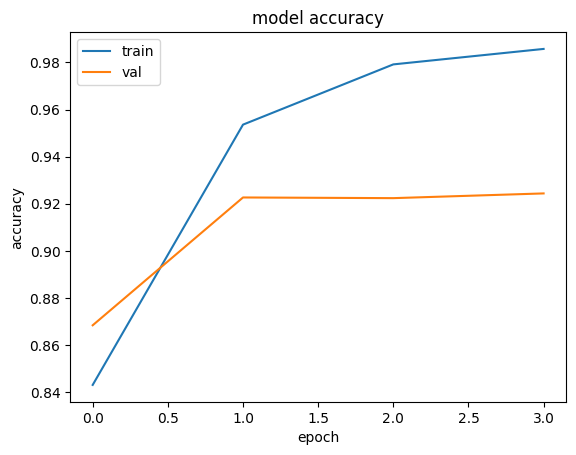

In [27]:

#plot accuracy 
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val',"test"], loc='upper left')

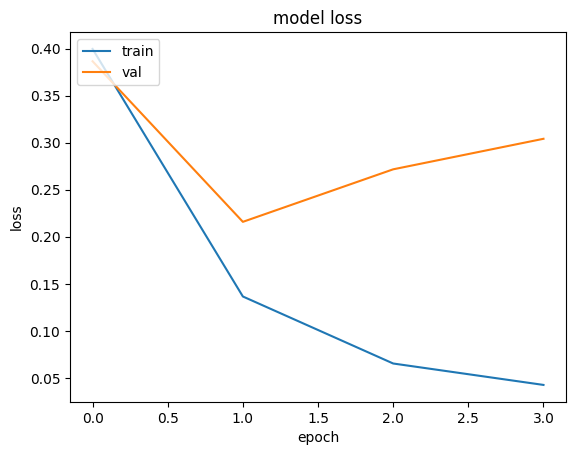

In [28]:

#plot accuracy 
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [35]:
model_tf5.evaluate(X_test, y_test,verbose=1)

219/219 [==============================] - 6s 29ms/step - loss: 0.2805 - accuracy: 0.9292


[0.28045734763145447, 0.9292466044425964]

In [26]:
model_tf5.save('models/model_tf5')

INFO:tensorflow:Assets written to: models/model_tf5/assets


INFO:tensorflow:Assets written to: models/model_tf5/assets


In [74]:
#build model
model_tf6 = Sequential()
model_tf6.add(Conv1D(256, 1, activation='relu', input_shape=(1,X_train.shape[2])))
model_tf6.add(BatchNormalization())
model_tf6.add(MaxPooling1D(1))
model_tf6.add(Dropout(0.2))
model_tf6.add(Conv1D(128, 1, activation='relu'))
model_tf6.add(BatchNormalization())
model_tf6.add(MaxPooling1D(1))
model_tf6.add(Dropout(0.2))
model_tf6.add(Conv1D(32, 1, activation='relu'))
model_tf6.add(BatchNormalization())
model_tf6.add(MaxPooling1D(1))
model_tf6.add(Flatten())
model_tf6.add(Dense(3, activation='softmax'))

model_tf6.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_tf6.summary()

#train model
history6 = model_tf6.fit(X_train, y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 1, 256)            22962688  
                                                                 
 batch_normalization_10 (Bat  (None, 1, 256)           1024      
 chNormalization)                                                
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 1, 256)           0         
 1D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 1, 256)            0         
                                                                 
 conv1d_9 (Conv1D)           (None, 1, 128)            32896     
                                                                 
 batch_normalization_11 (Bat  (None, 1, 128)          

In [75]:
model_tf6.save('models/model_tf6')

INFO:tensorflow:Assets written to: models/model_tf6/assets


INFO:tensorflow:Assets written to: models/model_tf6/assets


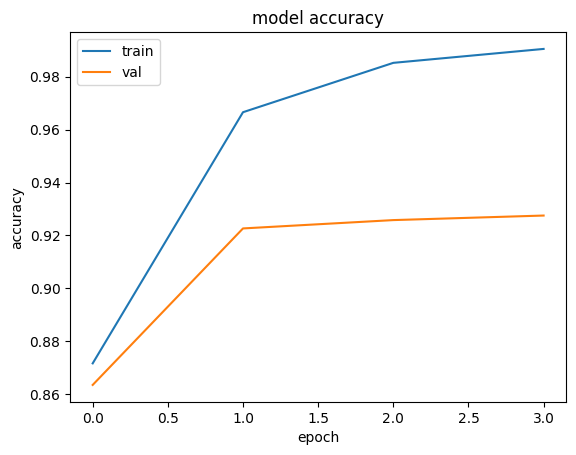

In [76]:
#plot accuracy
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')



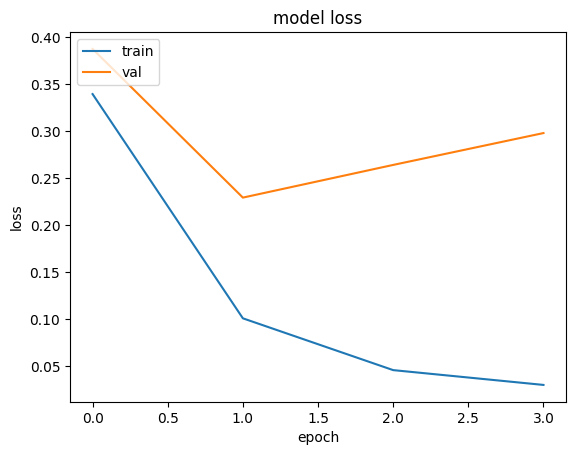

In [77]:
#plot accuracy
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')



In [78]:
model_tf6.evaluate(X_test, y_test,verbose=1)

219/219 [==============================] - 2s 8ms/step - loss: 0.2688 - accuracy: 0.9351


[0.2688186466693878, 0.9351188540458679]

In [100]:
#build model
model_tf7 = Sequential()
model_tf7.add(Conv1D(128, 1, activation='relu', input_shape=(1,X_train.shape[2])))
model_tf7.add(BatchNormalization())
model_tf7.add(MaxPooling1D(1))
model_tf7.add(Dropout(0.2))
model_tf7.add(Conv1D(128, 1, activation='relu'))
model_tf7.add(BatchNormalization())
model_tf7.add(MaxPooling1D(1))
model_tf7.add(Dropout(0.2))
model_tf7.add(Conv1D(32, 1, activation='relu'))
model_tf7.add(BatchNormalization())
model_tf7.add(MaxPooling1D(1))
model_tf7.add(Flatten())
model_tf7.add(Dense(128, activation='relu'))
model_tf7.add(BatchNormalization())
model_tf7.add(Dropout(0.2))
model_tf7.add(Dense(3, activation='softmax'))

model_tf7.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_tf7.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_23 (Conv1D)          (None, 1, 128)            11481344  
                                                                 
 batch_normalization_28 (Bat  (None, 1, 128)           512       
 chNormalization)                                                
                                                                 
 max_pooling1d_23 (MaxPoolin  (None, 1, 128)           0         
 g1D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 1, 128)            0         
                                                                 
 conv1d_24 (Conv1D)          (None, 1, 128)            16512     
                                                                 
 batch_normalization_29 (Bat  (None, 1, 128)          

In [ ]:

#train model
history7 = model_tf7.fit(X_train, y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("tfidfmodel")

2023-02-02 06:45:39.744887: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2182/2182 [==============================] - 135s 62ms/step


In [15]:
import joblib
coeffs = joblib.load('coeflist.pkl')
#make coeffs to np array
coeffs=np.array(coeffs)

In [16]:
#make coeffs float16 dtype
coeffs=coeffs.astype(np.float16)

In [17]:
from sklearn.model_selection import train_test_split
#train test split for coeffs wv
Wv_train, Wv_test, y_train, y_test = train_test_split(coeffs, df["sentiment"], test_size=0.2, random_state=42)
#10% validation split of test
Wv_test, Wv_val, y_test, y_val = train_test_split(Wv_test, y_test, test_size=0.5, random_state=42)

In [18]:
#change ytrain ytest yval to array
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
y_val=y_val.to_numpy()


In [19]:

#reshape x and y for training, testing and validation convolutional neural network
Wv_train=Wv_train.reshape(Wv_train.shape[0],1,Wv_train.shape[1])

Wv_test=Wv_test.reshape(Wv_test.shape[0],1,Wv_test.shape[1])


Wv_val=Wv_val.reshape(Wv_val.shape[0],1,Wv_val.shape[1])



In [20]:

print(Wv_test.shape)
print(Wv_val.shape)
print(Wv_train.shape)



(6982, 1, 44849)
(6983, 1, 44849)
(55858, 1, 44849)


In [21]:
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
y_val=y_val.reshape(y_val.shape[0],1)

In [22]:
#make y_train, y_test and y_val one hot encoded
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=3)
y_test = to_categorical(y_test,num_classes=3)
y_val = to_categorical(y_val,num_classes=3)

In [34]:
#build model
modelwv2 = Sequential()
modelwv2.add(Conv1D(128, 1, activation='relu', input_shape=(1,Wv_train.shape[2])))
modelwv2.add(MaxPooling1D(1))
modelwv2.add(Dropout(0.5))
modelwv2.add(Conv1D(64, 1, activation='relu'))
modelwv2.add(MaxPooling1D(1))
modelwv2.add(Dropout(0.5))
modelwv2.add(Conv1D(32, 1, activation='relu'))
modelwv2.add(MaxPooling1D(1))
modelwv2.add(Flatten())
modelwv2.add(Dense(3, activation='softmax'))

modelwv2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

modelwv2.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 1, 128)            5740800   
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 1, 128)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 1, 64)             8256      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 1, 64)            

In [35]:


historywv2 = modelwv2.fit(Wv_train, y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=(Wv_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])



Epoch 1/5
437/437 [==============================] - 73s 166ms/step - loss: 0.4280 - accuracy: 0.8287 - val_loss: 0.2061 - val_accuracy: 0.9288
Epoch 2/5
437/437 [==============================] - 69s 157ms/step - loss: 0.1430 - accuracy: 0.9532 - val_loss: 0.1904 - val_accuracy: 0.9371
Epoch 3/5
437/437 [==============================] - 68s 156ms/step - loss: 0.0761 - accuracy: 0.9768 - val_loss: 0.2134 - val_accuracy: 0.9353
Epoch 4/5
437/437 [==============================] - 68s 156ms/step - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.2463 - val_accuracy: 0.9330
Epoch 4: early stopping


In [56]:
#build model
modelwv2bn = Sequential()
modelwv2bn.add(Conv1D(128, 1, activation='relu', input_shape=(1,Wv_train.shape[2])))
modelwv2bn.add(BatchNormalization())
modelwv2bn.add(MaxPooling1D(1))
modelwv2bn.add(Dropout(0.5))
modelwv2bn.add(Conv1D(64, 1, activation='relu'))
modelwv2bn.add(BatchNormalization())
modelwv2bn.add(MaxPooling1D(1))
modelwv2bn.add(Dropout(0.5))
modelwv2bn.add(Conv1D(32, 1, activation='relu'))
modelwv2bn.add(BatchNormalization())
modelwv2bn.add(MaxPooling1D(1))
modelwv2bn.add(Flatten())
modelwv2bn.add(Dense(3, activation='softmax'))

modelwv2bn.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

modelwv2bn.summary()



historywv2bn = modelwv2bn.fit(Wv_train, y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=(Wv_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 1, 128)            5740800   
                                                                 
 batch_normalization_9 (Batc  (None, 1, 128)           512       
 hNormalization)                                                 
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 1, 128)           0         
 g1D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 1, 128)            0         
                                                                 
 conv1d_16 (Conv1D)          (None, 1, 64)             8256      
                                                                 
 batch_normalization_10 (Bat  (None, 1, 64)           

In [57]:
modelwv2bn.evaluate(Wv_test, y_test, verbose=1)

219/219 [==============================] - 1s 3ms/step - loss: 0.2225 - accuracy: 0.9221


[0.22247378528118134, 0.9220853447914124]

In [37]:
modelwv2.evaluate(Wv_test, y_test, verbose=1)

219/219 [==============================] - 1s 3ms/step - loss: 0.1830 - accuracy: 0.9403


[0.18295621871948242, 0.9402750134468079]

In [38]:
#save modelwv2
modelwv2.save('models/modelwv2')

INFO:tensorflow:Assets written to: models/modelwv2/assets


INFO:tensorflow:Assets written to: models/modelwv2/assets


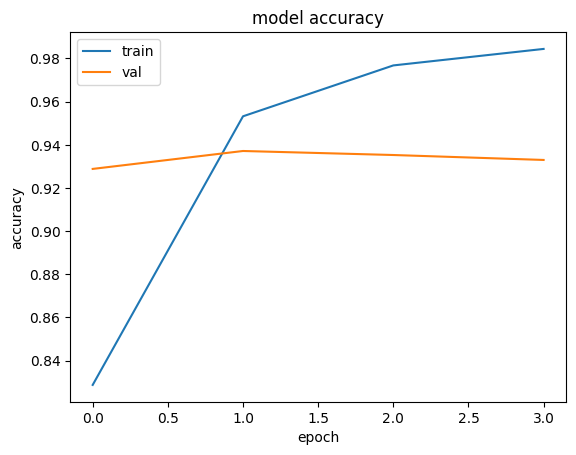

In [39]:
#plot accuracy
plt.plot(historywv2.history['accuracy'])
plt.plot(historywv2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')



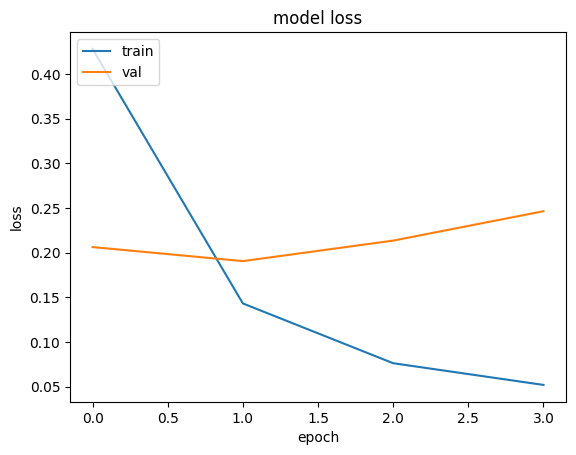

In [40]:
#plot accuracy
plt.plot(historywv2.history['loss'])
plt.plot(historywv2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')



In [65]:
#build model
model_wv3 = Sequential()
model_wv3.add(Conv1D(64, 1, activation='relu', input_shape=(1,Wv_train.shape[2])))
model_wv3.add(MaxPooling1D(1))
model_wv3.add(Dropout(0.5))
model_wv3.add(Conv1D(128, 1, activation='relu'))
model_wv3.add(MaxPooling1D(1))
model_wv3.add(Flatten())
model_wv3.add(Dense(3, activation='softmax'))

model_wv3.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_wv3.summary()


#train model
historywv3 = model_wv3.fit(Wv_train, y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=(Wv_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 1, 64)             2870400   
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 1, 64)             0         
                                                                 
 conv1d_23 (Conv1D)          (None, 1, 128)            8320      
                                                                 
 max_pooling1d_23 (MaxPoolin  (None, 1, 128)           0         
 g1D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 128)              

In [66]:
model_wv3.evaluate(Wv_test, y_test, verbose=1)

219/219 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.9437


[0.17700427770614624, 0.9437124133110046]

In [54]:
#build model
model_wv3bn = Sequential()
model_wv3bn.add(Conv1D(64, 1, activation='relu', input_shape=(1,Wv_train.shape[2])))
model_wv3bn.add(BatchNormalization())
model_wv3bn.add(MaxPooling1D(1))
model_wv3bn.add(Dropout(0.5))
model_wv3bn.add(Conv1D(128, 1, activation='relu'))
model_wv3bn.add(BatchNormalization())
model_wv3bn.add(MaxPooling1D(1))
model_wv3bn.add(Flatten())
model_wv3bn.add(Dense(3, activation='softmax'))

model_wv3bn.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_wv3bn.summary()


#train model
historywv3bn = model_wv3bn.fit(Wv_train, y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=(Wv_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 1, 64)             2870400   
                                                                 
 batch_normalization_7 (Batc  (None, 1, 64)            256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 1, 64)             0         
                                                                 
 conv1d_14 (Conv1D)          (None, 1, 128)            8320      
                                                                 
 batch_normalization_8 (Batc  (None, 1, 128)          

In [58]:
model_wv3bn.evaluate(Wv_test, y_test, verbose=1)

219/219 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9281


[0.20561832189559937, 0.9281008243560791]

In [67]:
model_wv3.evaluate(Wv_test, y_test, verbose=1)

219/219 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.9437


[0.17700427770614624, 0.9437124133110046]

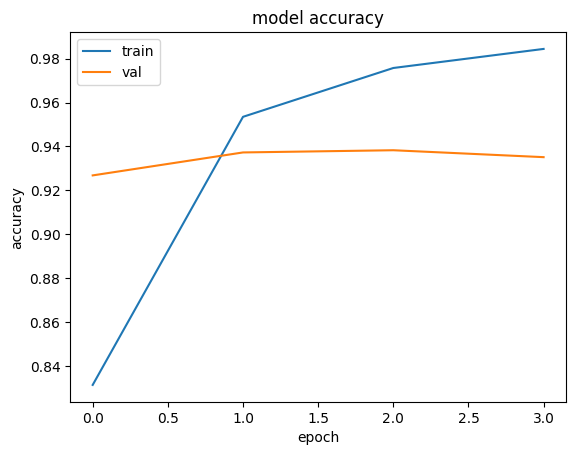

In [46]:
#plot accuracy
plt.plot(historywv3.history['accuracy'])
plt.plot(historywv3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')



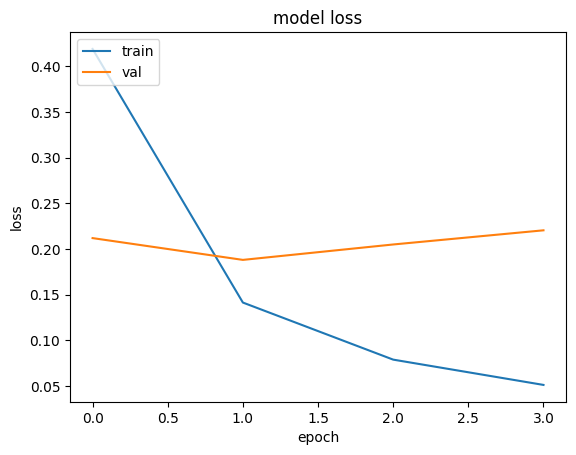

In [47]:
#plot accuracy
plt.plot(historywv3.history['loss'])
plt.plot(historywv3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')



In [48]:
model_wv3.save('models/model_wv3')

INFO:tensorflow:Assets written to: models/model_wv3/assets


INFO:tensorflow:Assets written to: models/model_wv3/assets


In [49]:
#build model
model_wv4 = Sequential()
model_wv4.add(Conv1D(128, 1, activation='relu', input_shape=(1,Wv_train.shape[2])))
model_wv4.add(MaxPooling1D(1))
model_wv4.add(Dropout(0.5))
model_wv4.add(Conv1D(32, 1, activation='relu'))
model_wv4.add(MaxPooling1D(1))
model_wv4.add(Flatten())
model_wv4.add(Dense(3, activation='softmax'))

model_wv4.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_wv4.summary()

#train model
historywv4 = model_wv4.fit(Wv_train, y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=(Wv_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 1, 128)            5740800   
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 1, 128)           0         
 g1D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 1, 128)            0         
                                                                 
 conv1d_12 (Conv1D)          (None, 1, 32)             4128      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 1, 32)            0         
 g1D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 32)               

In [50]:
model_wv4.evaluate(Wv_test, y_test, verbose=1)

219/219 [==============================] - 1s 3ms/step - loss: 0.1741 - accuracy: 0.9410


[0.17405593395233154, 0.9409911036491394]

In [51]:
model_wv4.save('models/model_wv4')

INFO:tensorflow:Assets written to: models/model_wv4/assets


INFO:tensorflow:Assets written to: models/model_wv4/assets


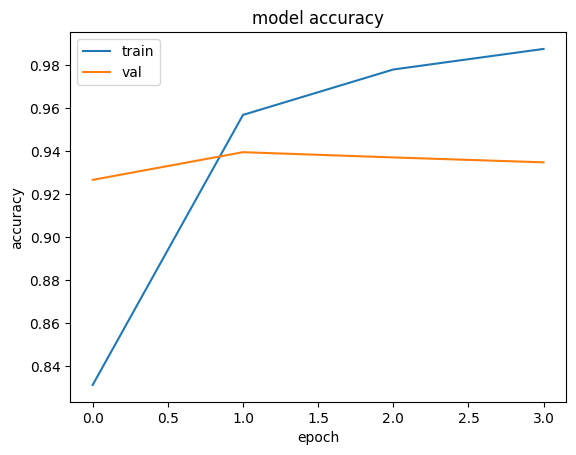

In [52]:
#plot accuracy
plt.plot(historywv4.history['accuracy'])
plt.plot(historywv4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')



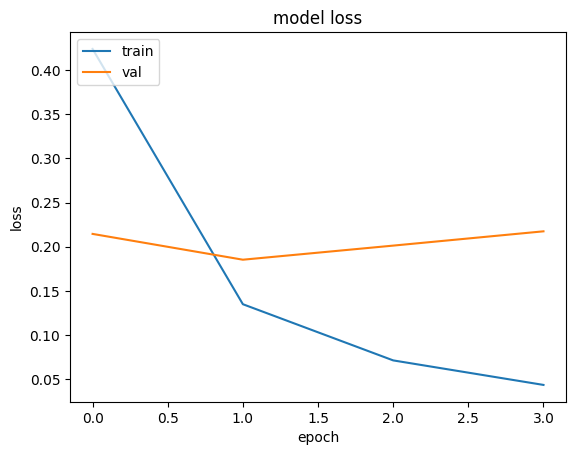

In [53]:
#plot accuracy
plt.plot(historywv4.history['loss'])
plt.plot(historywv4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')



In [68]:
#build model
model_wv5 = Sequential()
model_wv5.add(Conv1D(64, 1, activation='relu', input_shape=(1,Wv_train.shape[2])))
model_wv5.add(MaxPooling1D(1))
model_wv5.add(Flatten())
model_wv5.add(Dropout(0.5))
model_wv5.add(Dense(128, activation='relu'))
model_wv5.add(Dense(3, activation='softmax'))

model_wv5.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_wv5.summary()

#train model
historywv5 = model_wv5.fit(Wv_train, y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=(Wv_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 1, 64)             2870400   
                                                                 
 max_pooling1d_24 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 64)                0         
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 3)                 387       
                                                     

In [69]:
model_wv5.evaluate(Wv_test, y_test, verbose=1)

219/219 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.9423


[0.17403991520404816, 0.9422801733016968]

In [70]:
model_wv5.save('models/model_wv5')

INFO:tensorflow:Assets written to: models/model_wv5/assets


INFO:tensorflow:Assets written to: models/model_wv5/assets


NameError: name 'test_accuracy' is not defined

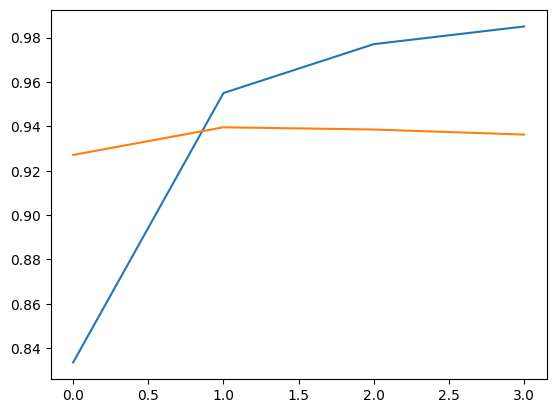

In [71]:

#plot accuracy 
plt.plot(historywv5.history['accuracy'])
plt.plot(historywv5.history['val_accuracy'])
plt.plot(test_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val',"test"], loc='upper left')

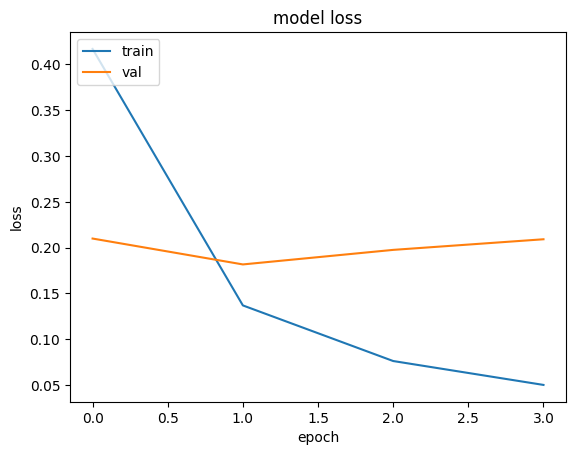

In [72]:

#plot accuracy 
plt.plot(historywv5.history['loss'])
plt.plot(historywv5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [77]:
model_wv6 = Sequential()
model_wv6.add(Conv1D(512, 1, activation='relu', input_shape=(1,Wv_train.shape[2])))
model_wv6.add(BatchNormalization())
model_wv6.add(MaxPooling1D(1))
model_wv6.add(Dropout(0.2))
model_wv6.add(Conv1D(256, 1, activation='relu'))
model_wv6.add(BatchNormalization())
model_wv6.add(MaxPooling1D(1))
model_wv6.add(Dropout(0.2))
model_wv6.add(Conv1D(128, 1, activation='relu'))
model_wv6.add(BatchNormalization())
model_wv6.add(MaxPooling1D(1))
model_wv6.add(Dropout(0.2))
model_wv6.add(Conv1D(64, 1, activation='relu'))
model_wv6.add(BatchNormalization())
model_wv6.add(MaxPooling1D(1))
model_wv6.add(Flatten())
model_wv6.add(Dropout(0.2))
model_wv6.add(Dense(128, activation='relu'))
model_wv6.add(BatchNormalization())
model_wv6.add(Dense(3, activation='softmax'))
model_wv6.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_wv6.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_25 (Conv1D)          (None, 1, 512)            22963200  
                                                                 
 batch_normalization_12 (Bat  (None, 1, 512)           2048      
 chNormalization)                                                
                                                                 
 max_pooling1d_25 (MaxPoolin  (None, 1, 512)           0         
 g1D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 1, 512)            0         
                                                                 
 conv1d_26 (Conv1D)          (None, 1, 256)            131328    
                                                                 
 batch_normalization_13 (Bat  (None, 1, 256)         

In [78]:
historywv6 = model_wv6.fit(Wv_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(Wv_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/10
437/437 [==============================] - 545s 1s/step - loss: 0.4207 - accuracy: 0.8343 - val_loss: 0.4791 - val_accuracy: 0.8312
Epoch 2/10
437/437 [==============================] - 555s 1s/step - loss: 0.1501 - accuracy: 0.9489 - val_loss: 0.2595 - val_accuracy: 0.9154
Epoch 3/10
437/437 [==============================] - 656s 2s/step - loss: 0.0765 - accuracy: 0.9750 - val_loss: 0.3220 - val_accuracy: 0.9098
Epoch 4/10
437/437 [==============================] - 558s 1s/step - loss: 0.0520 - accuracy: 0.9834 - val_loss: 0.3489 - val_accuracy: 0.9151
Epoch 4: early stopping


In [79]:
model_wv6_nobn = Sequential()
model_wv6_nobn.add(Conv1D(512, 1, activation='relu', input_shape=(1,Wv_train.shape[2])))
model_wv6_nobn.add(MaxPooling1D(1))
model_wv6_nobn.add(Dropout(0.2))
model_wv6_nobn.add(Conv1D(256, 1, activation='relu'))
model_wv6_nobn.add(MaxPooling1D(1))
model_wv6_nobn.add(Dropout(0.2))
model_wv6_nobn.add(Conv1D(128, 1, activation='relu'))
model_wv6_nobn.add(MaxPooling1D(1))
model_wv6_nobn.add(Dropout(0.2))
model_wv6_nobn.add(Conv1D(64, 1, activation='relu'))
model_wv6_nobn.add(MaxPooling1D(1))
model_wv6_nobn.add(Flatten())
model_wv6_nobn.add(Dropout(0.2))
model_wv6_nobn.add(Dense(128, activation='relu'))
model_wv6_nobn.add(Dense(3, activation='softmax'))
model_wv6_nobn.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_wv6_nobn.summary()

historywv6_nobn = model_wv6_nobn.fit(Wv_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(Wv_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_29 (Conv1D)          (None, 1, 512)            22963200  
                                                                 
 max_pooling1d_29 (MaxPoolin  (None, 1, 512)           0         
 g1D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 1, 512)            0         
                                                                 
 conv1d_30 (Conv1D)          (None, 1, 256)            131328    
                                                                 
 max_pooling1d_30 (MaxPoolin  (None, 1, 256)           0         
 g1D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 1, 256)          

In [82]:
model_wv6_nobn.evaluate(Wv_test, y_test, verbose=1)

219/219 [==============================] - 3s 15ms/step - loss: 0.1968 - accuracy: 0.9364


[0.19678951799869537, 0.9364079236984253]

In [84]:
model_wv6_nobn.save('models/model_wv6_nobn')

INFO:tensorflow:Assets written to: models/model_wv6_nobn/assets


INFO:tensorflow:Assets written to: models/model_wv6_nobn/assets


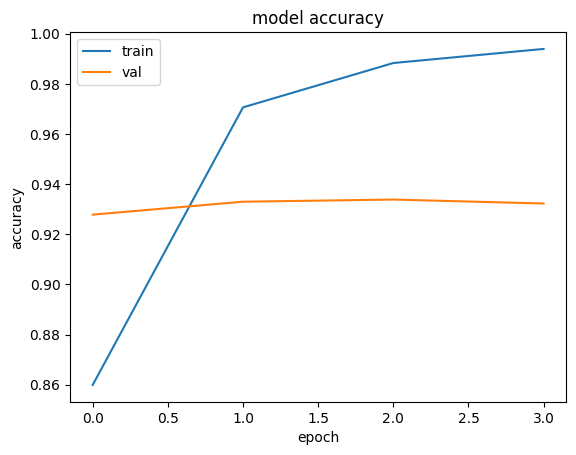

In [85]:

#plot accuracy 
plt.plot(historywv6_nobn.history['accuracy'])
plt.plot(historywv6_nobn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

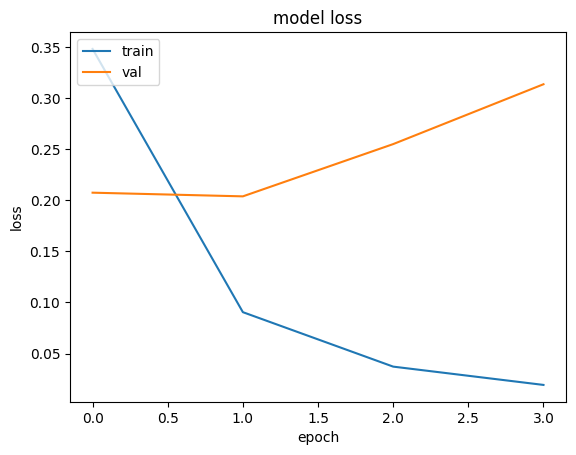

In [88]:

#plot accuracy 
plt.plot(historywv6_nobn.history['loss'])
plt.plot(historywv6_nobn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [83]:
model_wv6.evaluate(Wv_test, y_test, verbose=1)

219/219 [==============================] - 3s 15ms/step - loss: 0.2393 - accuracy: 0.9204


[0.23932835459709167, 0.920366644859314]

In [41]:
model_wv6.save('models/model_wv6')

INFO:tensorflow:Assets written to: models/model_wv6/assets


INFO:tensorflow:Assets written to: models/model_wv6/assets


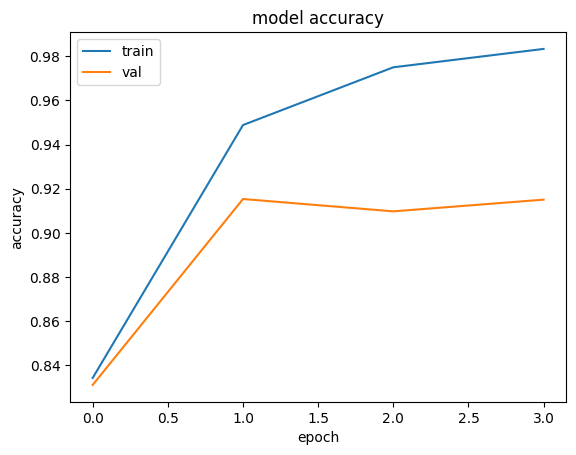

In [87]:

#plot accuracy 
plt.plot(historywv6.history['accuracy'])
plt.plot(historywv6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

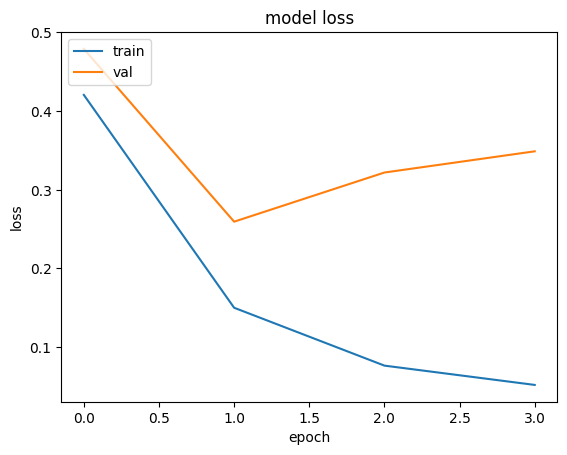

In [86]:

#plot accuracy 
plt.plot(historywv6.history['loss'])
plt.plot(historywv6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [28]:
#build model
model_wv7 = Sequential()
model_wv7.add(Conv1D(256, 1, activation='relu', input_shape=(1,Wv_train.shape[2])))
model_wv7.add(BatchNormalization())
model_wv7.add(MaxPooling1D(1))
model_wv7.add(Dropout(0.2))
model_wv7.add(Conv1D(128, 1, activation='relu'))
model_wv7.add(BatchNormalization())
model_wv7.add(MaxPooling1D(1))
model_wv7.add(Dropout(0.2))
model_wv7.add(Conv1D(32, 1, activation='relu'))
model_wv7.add(BatchNormalization())
model_wv7.add(MaxPooling1D(1))
model_wv7.add(Flatten())
model_wv7.add(Dense(3, activation='softmax'))

model_wv7.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_wv7.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 1, 256)            11481600  
                                                                 
 batch_normalization_4 (Batc  (None, 1, 256)           1024      
 hNormalization)                                                 
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1, 256)           0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 1, 256)            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 1, 128)            32896     
                                                                 
 batch_normalization_5 (Batc  (None, 1, 128)          

In [29]:

#train model
historywv7 = model_wv7.fit(Wv_train, y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=(Wv_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])


Epoch 1/5
437/437 [==============================] - 272s 620ms/step - loss: 0.3624 - accuracy: 0.8603 - val_loss: 0.4348 - val_accuracy: 0.8472
Epoch 2/5
437/437 [==============================] - 275s 629ms/step - loss: 0.1129 - accuracy: 0.9615 - val_loss: 0.2484 - val_accuracy: 0.9155
Epoch 3/5
437/437 [==============================] - 277s 635ms/step - loss: 0.0535 - accuracy: 0.9826 - val_loss: 0.3095 - val_accuracy: 0.9162
Epoch 4/5
437/437 [==============================] - 283s 648ms/step - loss: 0.0365 - accuracy: 0.9877 - val_loss: 0.3548 - val_accuracy: 0.9164
Epoch 4: early stopping


In [30]:
model_wv7.evaluate(Wv_test, y_test, verbose=1)

219/219 [==============================] - 1s 5ms/step - loss: 0.2383 - accuracy: 0.9195


[0.23832446336746216, 0.9195073246955872]

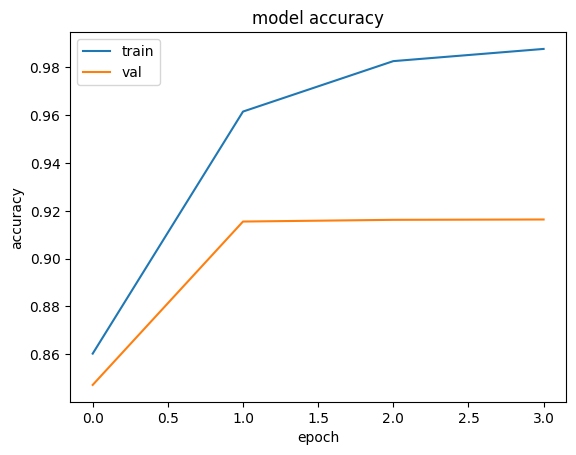

In [31]:

#plot accuracy 
plt.plot(historywv7.history['accuracy'])
plt.plot(historywv7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

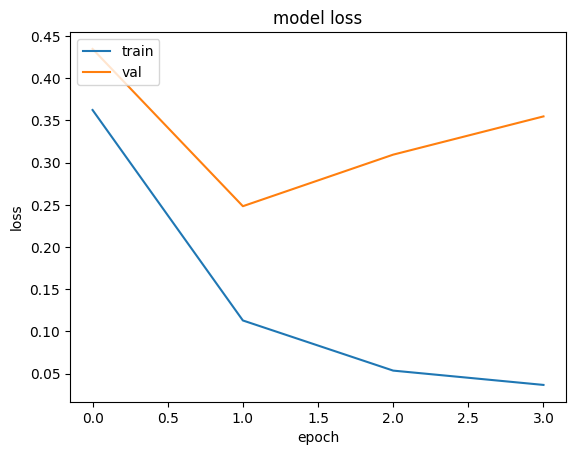

In [32]:

#plot accuracy 
plt.plot(historywv7.history['loss'])
plt.plot(historywv7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [33]:
model_wv7.save('models/model_wv7')

INFO:tensorflow:Assets written to: models/model_wv7/assets


INFO:tensorflow:Assets written to: models/model_wv7/assets


In [23]:
#build model
model_wv8 = Sequential()
model_wv8.add(Conv1D(256, 1, activation='relu', input_shape=(1,Wv_train.shape[2])))
model_wv8.add(BatchNormalization())
model_wv8.add(MaxPooling1D(1))
model_wv8.add(Dropout(0.2))
model_wv8.add(Conv1D(128, 1, activation='relu'))
model_wv8.add(BatchNormalization())
model_wv8.add(MaxPooling1D(1))
model_wv8.add(Dropout(0.2))
model_wv8.add(Conv1D(64, 1, activation='relu'))
model_wv8.add(BatchNormalization())
model_wv8.add(MaxPooling1D(1))
model_wv8.add(Flatten())
model_wv8.add(Dense(128, activation='relu'))
model_wv8.add(BatchNormalization())
model_wv8.add(Dropout(0.2))
model_wv8.add(Dense(3, activation='softmax'))

model_wv8.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_wv8.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 256)            11481600  
                                                                 
 batch_normalization (BatchN  (None, 1, 256)           1024      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 256)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 1, 256)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 128)            32896     
                                                                 
 batch_normalization_1 (Batc  (None, 1, 128)           5

In [24]:

#train model
historywv8 = model_wv8.fit(Wv_train, y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=(Wv_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])


Epoch 1/5


2023-02-12 04:50:35.258416: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


437/437 [==============================] - 267s 608ms/step - loss: 0.4146 - accuracy: 0.8369 - val_loss: 0.4545 - val_accuracy: 0.8336
Epoch 2/5
437/437 [==============================] - 264s 604ms/step - loss: 0.1391 - accuracy: 0.9519 - val_loss: 0.2399 - val_accuracy: 0.9189
Epoch 3/5
437/437 [==============================] - 271s 620ms/step - loss: 0.0695 - accuracy: 0.9772 - val_loss: 0.3002 - val_accuracy: 0.9178
Epoch 4/5
437/437 [==============================] - 273s 626ms/step - loss: 0.0474 - accuracy: 0.9843 - val_loss: 0.3467 - val_accuracy: 0.9179
Epoch 4: early stopping


In [25]:
model_wv8.evaluate(Wv_test, y_test, verbose=1)

219/219 [==============================] - 1s 5ms/step - loss: 0.2367 - accuracy: 0.9189


[0.23672668635845184, 0.9189344048500061]

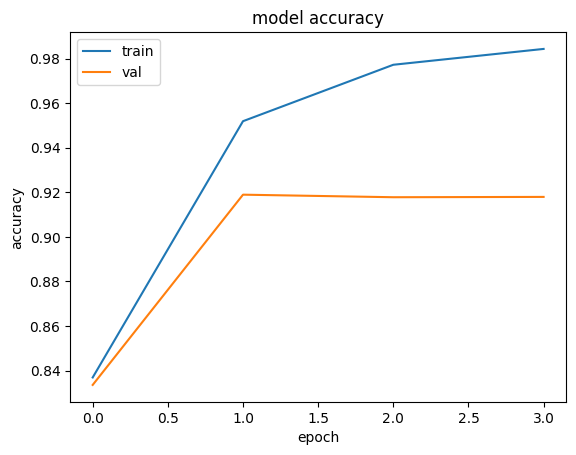

In [26]:

#plot accuracy 
plt.plot(historywv8.history['accuracy'])
plt.plot(historywv8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

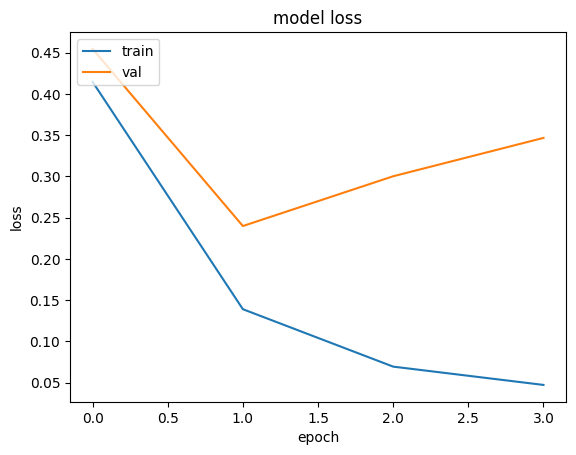

In [27]:

#plot accuracy 
plt.plot(historywv8.history['loss'])
plt.plot(historywv8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [29]:


#build model
modelwv = Sequential()
modelwv.add(Conv1D(32, 3, activation='relu', input_shape=(Wv_train.shape[1],1)))
modelwv.add(MaxPooling1D(3))
modelwv.add(Flatten())
modelwv.add(Dropout(0.8))
modelwv.add(Dense(8, activation='relu'))
modelwv.add(Dense(3, activation='softmax'))

modelwv.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

modelwv.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 44847, 32)         128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14949, 32)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 478368)            0         
                                                                 
 dropout (Dropout)           (None, 478368)            0         
                                                                 
 dense (Dense)               (None, 8)                 3826952   
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                        

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1 ,patience=1, mode='min')
#train model
historywv = modelwv.fit(Wv_train, y_train,
                    batch_size=128,
                    epochs=3,
                    validation_data=(Wv_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])


Epoch 1/3
437/437 [==============================] - 231s 527ms/step - loss: 0.8838 - accuracy: 0.6734 - val_loss: 0.6725 - val_accuracy: 0.8017
Epoch 2/3
437/437 [==============================] - 259s 592ms/step - loss: 0.4858 - accuracy: 0.8178 - val_loss: 0.3213 - val_accuracy: 0.8829
Epoch 3/3
437/437 [==============================] - 276s 631ms/step - loss: 0.2736 - accuracy: 0.9026 - val_loss: 0.2654 - val_accuracy: 0.9126


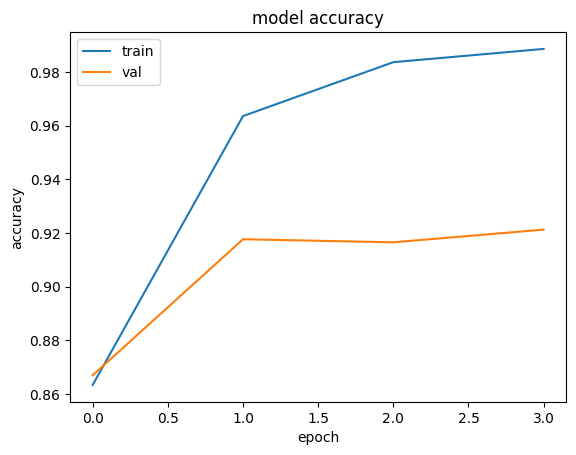

In [92]:

#plot accuracy 
plt.plot(historywv7.history['accuracy'])
plt.plot(historywv7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

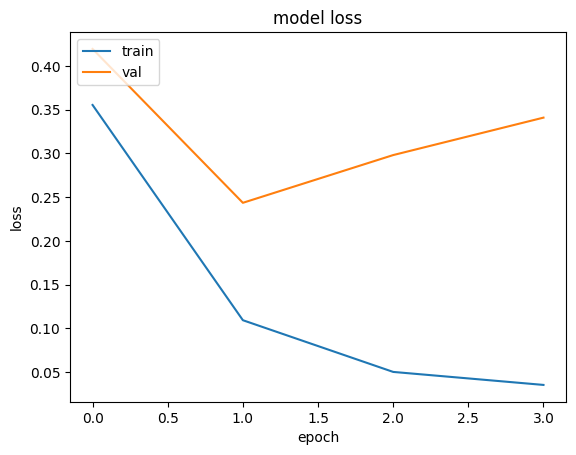

In [93]:

#plot accuracy 
plt.plot(historywv7.history['loss'])
plt.plot(historywv7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

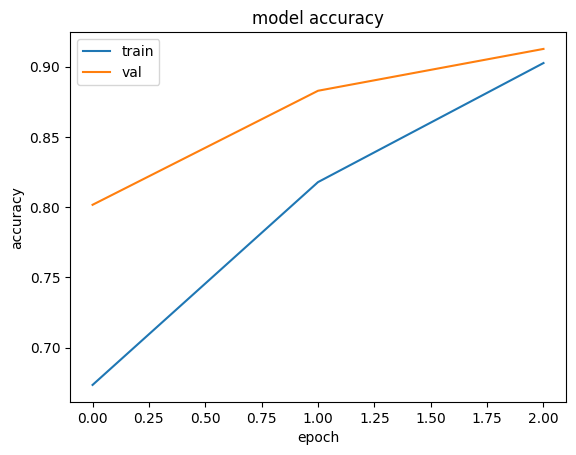

In [34]:

#plot accuracy 
plt.plot(historywv.history['accuracy'])
plt.plot(historywv.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

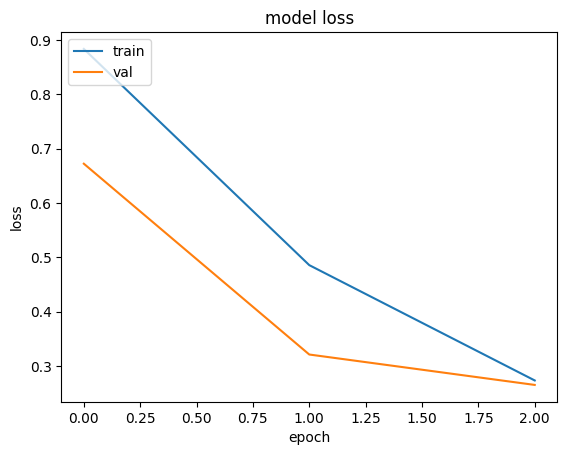

In [33]:

plt.plot(historywv.history['loss'])
plt.plot(historywv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()




In [46]:
from tensorflow.keras.models import load_model
modelwv = load_model("models/wvmodel")

In [47]:
modelwv.evaluate(Wv_test, y_test, verbose=2)

2023-02-02 10:35:03.121301: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


219/219 - 7s - loss: 0.2488 - accuracy: 0.9139 - 7s/epoch - 30ms/step


[0.2488248348236084, 0.9139215350151062]

In [7]:
coeffs=coeffs.reshape(coeffs.shape[0],coeffs.shape[1],1)

In [8]:
coeffs.shape

(69823, 44849, 1)

In [9]:
pd.DataFrame(modelwv.predict(coeffs),columns=["wv_neg_clean","wv_neu_clean","wv_pos_clean"]).to_csv("sentiment_wv.csv")

   1/2182 [..............................] - ETA: 4:56

2023-02-02 07:20:35.299529: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2182/2182 [==============================] - 70s 32ms/step


In [36]:
modelwv.save("wvmodel")

INFO:tensorflow:Assets written to: wvmodel/assets


INFO:tensorflow:Assets written to: wvmodel/assets


# WORD2VEC EMBEDDINGS

In [72]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors


In [75]:
df=pd.read_pickle("preprocessed.pkl")

In [82]:
cbow_vectors = gensim.models.Word2Vec(df['Clean_Tweet'],vector_size=300,window=3, min_count=2)
cbow_vectors.train(df['Clean_Tweet'],total_examples=len(df['Clean_Tweet']),epochs=30)


(41900426, 202191090)

In [83]:
#create clean_tweet tokenized column
df['Clean_Tweet_Tokenized'] = df['Clean_Tweet'].apply(lambda x: x.split())

In [85]:
#creating vectors for each tweet
words = set(cbow_vectors.wv.index_to_key )
df['Text_vect'] = np.array([np.array([cbow_vectors.wv[i] for i in ls if i in words])
                         for ls in df['Clean_Tweet_Tokenized']])



/var/folders/pj/_k55qbhj39dcrl55zbnt5z7h0000gn/T/ipykernel_90727/2890085495.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df['Text_vect'] = np.array([np.array([cbow_vectors.wv[i] for i in ls if i in words])


In [88]:
#creating same sized vectors for each tweet
vector_size_n = 300
text_vect_avg = []
for v in df['Text_vect']:
    if v.size:
        text_vect_avg.append(v.mean(axis=0))
    else:
        text_vect_avg.append(np.zeros(vector_size_n, dtype=float)) # the same vector size must be used here as for model training
        
        
df['Text_vect_avg'] = text_vect_avg

In [95]:
#create numpy array from text_vect_avg column
text_vect_avg=np.array(df['Text_vect_avg'].tolist())


In [97]:
#split data into training, testing and validation without train_test_split
w2v_train = text_vect_avg[:int(text_vect_avg.shape[0]*0.8)]
w2v_test = text_vect_avg[int(text_vect_avg.shape[0]*0.8):int(text_vect_avg.shape[0]*0.9)]
w2v_val = text_vect_avg[int(text_vect_avg.shape[0]*0.9):]


In [98]:
#reshape x and y for training, testing and validation convolutional neural network
w2v_train=w2v_train.reshape(w2v_train.shape[0],w2v_train.shape[1],1)
w2v_test=w2v_test.reshape(w2v_test.shape[0],w2v_test.shape[1],1)
w2v_val=w2v_val.reshape(w2v_val.shape[0],w2v_val.shape[1],1)

In [56]:
w2v_val[:3]

NameError: name 'w2v_val' is not defined

In [102]:


#build model
modelw2vdeneme = Sequential()
modelw2vdeneme.add(Conv1D(16, 3, activation='relu', input_shape=(w2v_train.shape[1],1)))
modelw2vdeneme.add(MaxPooling1D(3))
modelw2vdeneme.add(Flatten())
modelw2vdeneme.add(Dense(4, activation='relu'))
modelw2vdeneme.add(Dense(3, activation='softmax'))

modelw2vdeneme.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

modelw2vdeneme.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 298, 16)           64        
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 99, 16)           0         
 1D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 1584)              0         
                                                                 
 dense_18 (Dense)            (None, 4)                 6340      
                                                                 
 dense_19 (Dense)            (None, 3)                 15        
                                                                 
Total params: 6,419
Trainable params: 6,419
Non-trainable params: 0
____________________________________________________

In [103]:
#train model
historyw2v = modelw2vdeneme.fit(w2v_train, y_train,
                    batch_size=128,
                    epochs=3,
                    validation_data=(w2v_val, y_val))


Epoch 1/3
437/437 [==============================] - 2s 3ms/step - loss: 0.9671 - accuracy: 0.5271 - val_loss: 0.9473 - val_accuracy: 0.5403
Epoch 2/3
437/437 [==============================] - 1s 3ms/step - loss: 0.9456 - accuracy: 0.5530 - val_loss: 0.9385 - val_accuracy: 0.5432
Epoch 3/3
437/437 [==============================] - 1s 3ms/step - loss: 0.9430 - accuracy: 0.5544 - val_loss: 0.9365 - val_accuracy: 0.5385


In [104]:
modelw2vdeneme.evaluate(w2v_test,y_test)

219/219 [==============================] - 0s 750us/step - loss: 0.9659 - accuracy: 0.5275


[0.9659247398376465, 0.527499258518219]

In [35]:
y_pred.shape

(6982, 3)

In [38]:
y_pred

array([[0.47210345, 0.46506333, 0.0628332 ],
       [0.23492755, 0.6801276 , 0.0849448 ],
       [0.5997001 , 0.30878103, 0.09151892],
       ...,
       [0.7522134 , 0.16270538, 0.08508124],
       [0.7120504 , 0.22910105, 0.05884856],
       [0.25090465, 0.6587722 , 0.09032318]], dtype=float32)

In [101]:
y_pred[1]

array([1.], dtype=float32)

In [92]:
y_pred.value_counts()

1.0    6982
dtype: int64